In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Machine Learning Datasets\Regression\Concrete Compressive Strength.csv")
df.head(3)

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_Day,Concrete_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535


In [3]:
df.describe()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_Day,Concrete_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [4]:
df.shape

(1030, 9)

In [5]:
q1 = df['Age_Day'].quantile(0.25)
q3 = df['Age_Day'].quantile(0.75)

iqr = q3 - q1
min_range = q1 - (iqr*1.5)
max_range = q3 + (iqr*1.5)

df = df[df['Age_Day'] <= max_range]

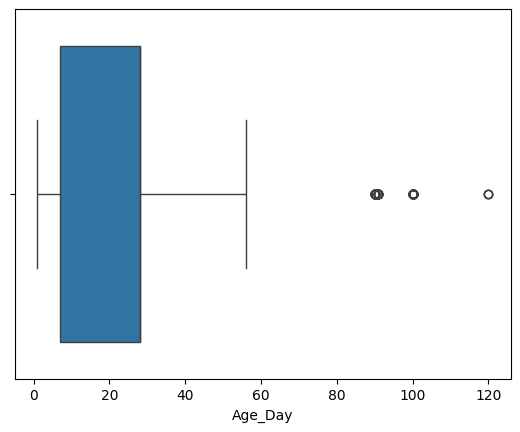

In [6]:
sns.boxplot(x = 'Age_Day', data=df)
plt.show()

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.sample(4)

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_Day,Concrete_Strength
352,213.5,0.0,174.24,154.61,11.66,1052.3,775.48,56,51.434910
14,304.0,76.0,0.00,228.00,0.00,932.0,670.00,28,47.813782
714,153.0,102.0,0.00,192.00,0.00,888.0,943.10,7,8.374375
884,300.0,0.0,120.00,212.00,10.00,878.0,728.00,28,23.835185


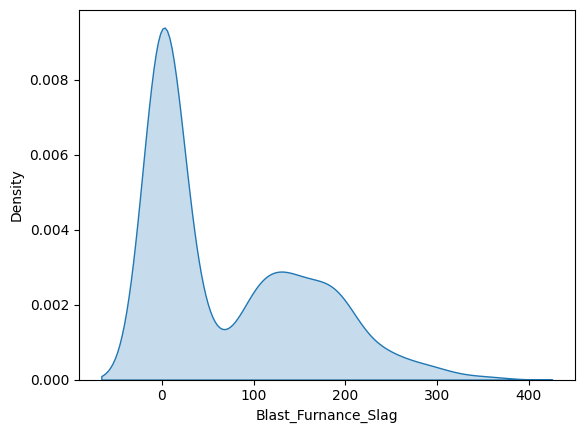

In [9]:
sns.kdeplot(data=df, x='Blast_Furnance_Slag', fill=True)
plt.show()

In [10]:
x = df.drop('Concrete_Strength', axis=1)
y = df['Concrete_Strength']

In [11]:
x['Blast_Furnance_Slag'] = np.log1p(x['Blast_Furnance_Slag'])
x['Fly_Ash'] = np.log1p(x['Fly_Ash'])
x['Superplasticizer'] = np.log1p(x['Superplasticizer'])
x['Age_Day'] = np.log1p(x['Age_Day'])

In [12]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

mms = StandardScaler()

for col in x.select_dtypes(include=['float64', 'int64']).columns:
    x[col] = mms.fit_transform(df[[col]])

In [13]:
x.head(4)

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_Day
0,2.551796,-0.840827,-0.913528,-0.904936,-0.662638,0.834034,-1.312534,-0.153583
1,2.551796,-0.840827,-0.913528,-0.904936,-0.662638,1.025091,-1.312534,-0.153583
5,-0.089639,0.475290,-0.913528,2.361795,-1.086555,-0.541579,-1.390623,2.023300
7,1.009352,0.255937,-0.913528,2.361795,-1.086555,-0.541579,-2.379750,-0.153583


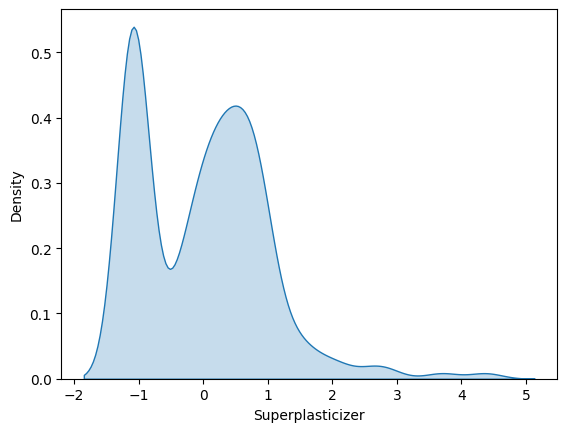

In [14]:
sns.kdeplot(x='Superplasticizer', data=x, fill=True)
plt.show()

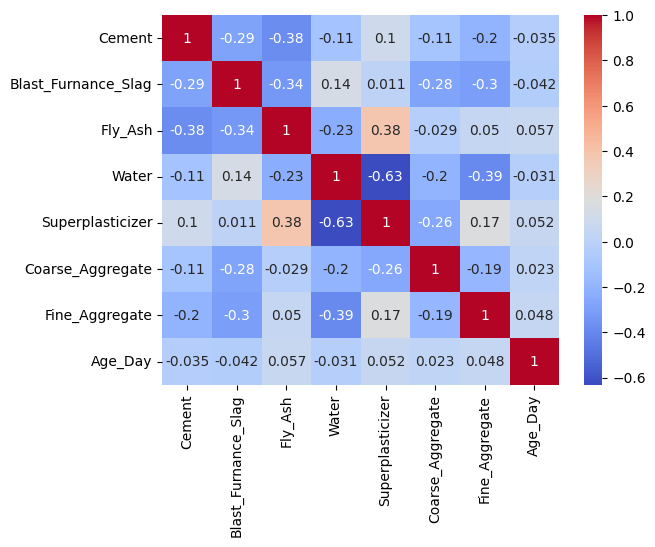

In [15]:
sns.heatmap(data=x.corr(), annot=True, cmap='coolwarm')
plt.show()

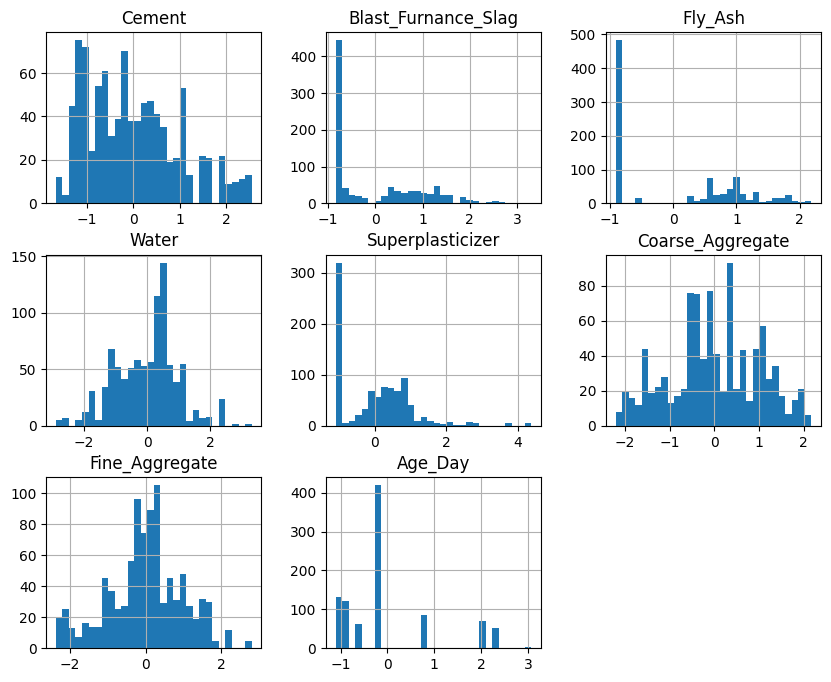

In [16]:
x.hist(bins=30, figsize=(10,8))
plt.show()

In [17]:
x.describe()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_Day
count,9.460000e+02,9.460000e+02,9.460000e+02,9.460000e+02,9.460000e+02,9.460000e+02,9.460000e+02,9.460000e+02
mean,3.455070e-16,-3.004409e-17,6.008818e-17,2.403527e-16,-3.004409e-17,-1.201764e-15,-5.257716e-16,6.008818e-17
std,1.000529e+00,1.000529e+00,1.000529e+00,1.000529e+00,1.000529e+00,1.000529e+00,1.000529e+00,1.000529e+00
min,-1.670644e+00,-8.408270e-01,-9.135278e-01,-2.897147e+00,-1.086555e+00,-2.210147e+00,-2.379750e+00,-1.101580e+00
25%,-8.190224e-01,-8.408270e-01,-9.135278e-01,-7.613975e-01,-1.086555e+00,-5.415790e-01,-5.121219e-01,-8.909140e-01
50%,-2.005024e-01,-6.099293e-01,-9.135278e-01,1.839747e-01,5.293408e-02,-5.756697e-02,4.217975e-02,-1.535828e-01
75%,6.141008e-01,8.077825e-01,9.275042e-01,5.799421e-01,6.337006e-01,8.340341e-01,6.136610e-01,-1.535828e-01
max,2.551796e+00,3.308404e+00,2.184794e+00,3.302218e+00,4.373498e+00,2.171436e+00,2.807961e+00,3.076630e+00


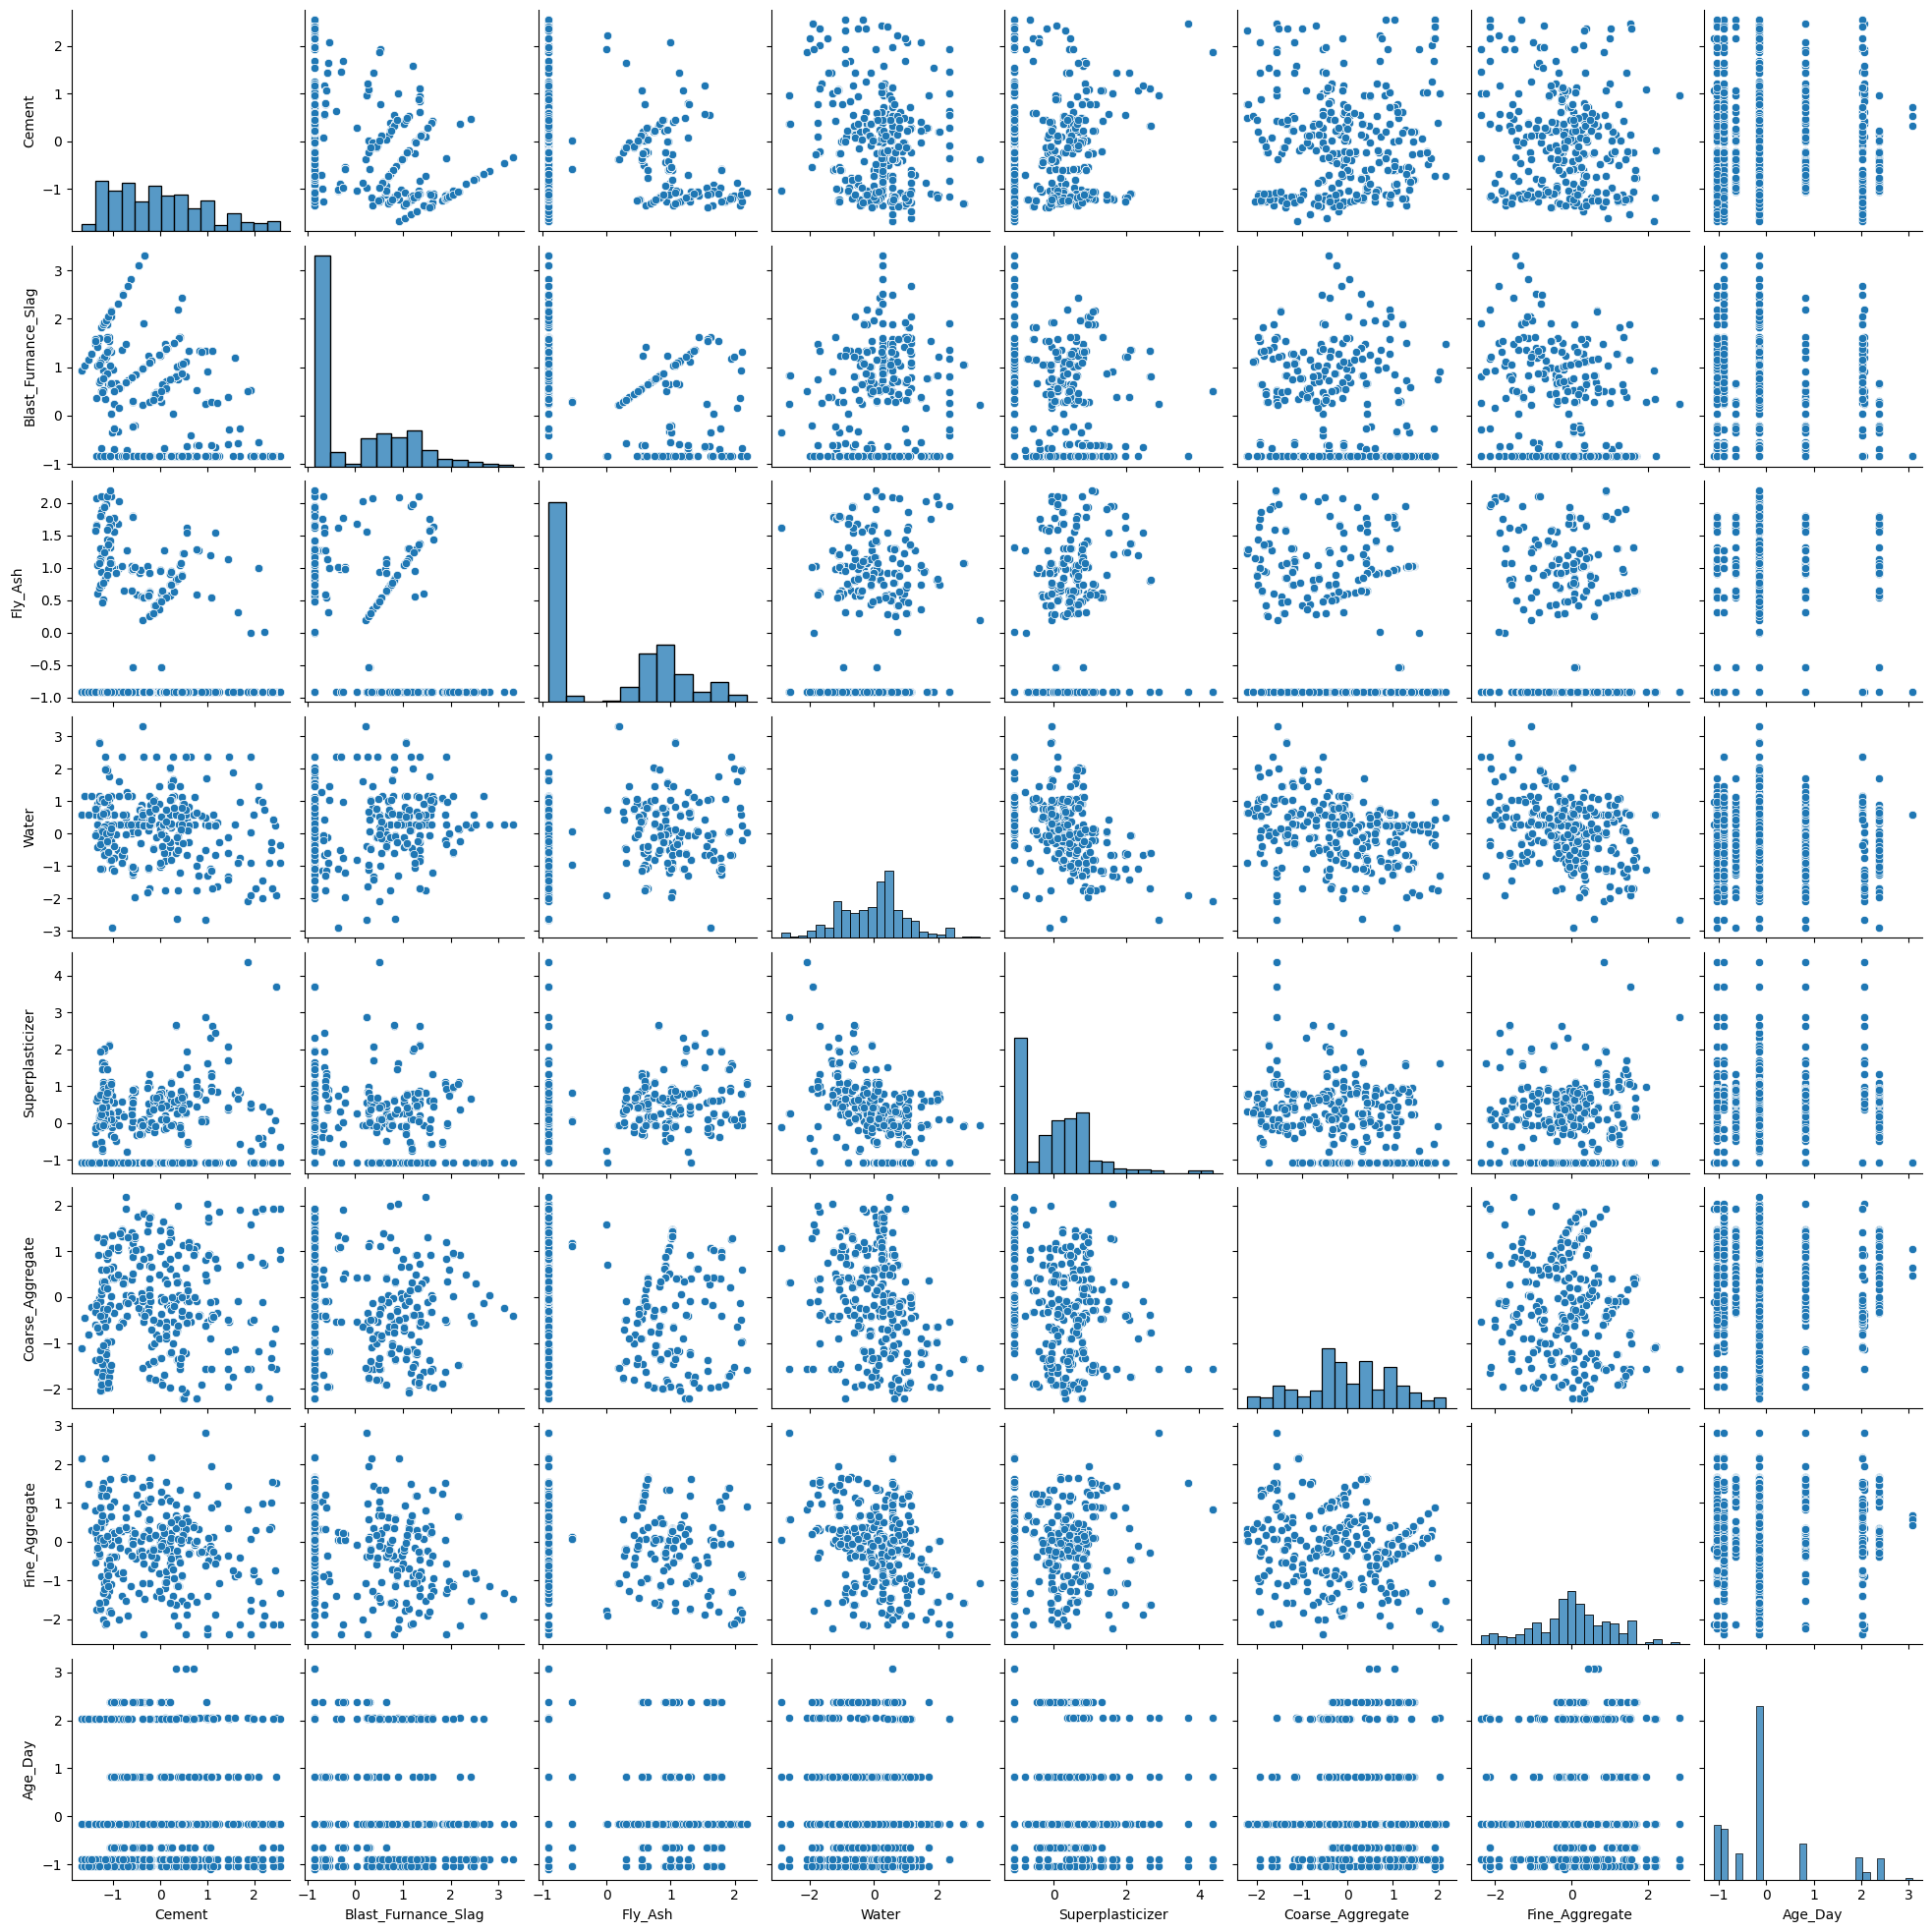

In [18]:
sns.pairplot(x)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Linear Regression Algorithm

In [21]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [22]:
print(f"Testing Accuracy: {round(lr.score(x_test, y_test)*100, 2)}")
print(f"Training Accuracy: {round(lr.score(x_train, y_train)*100, 2)}")
print(f"Mean Squared Error: {round(mean_squared_error(y_test, lr.predict(x_test))*100, 2)}")
print(f"Mean Absolute Error: {round(mean_squared_error(y_test, lr.predict(x_test))*100, 2)}")
print(f"Mean Squared Error: {round(root_mean_squared_error(y_test, lr.predict(x_test))*100, 2)}")

Testing Accuracy: 76.87
Training Accuracy: 73.66
Mean Squared Error: 6979.58
Mean Absolute Error: 6979.58
Mean Squared Error: 835.44


In [23]:
print(lr.coef_)
print(lr.intercept_)

[11.72959708  7.90544416  4.72674962 -3.2033467   0.98590097  0.94258807
  0.29848669  8.53457832]
34.75232546502654


## Lasso Regularization Algorithm

In [24]:
ls = Lasso(alpha=0.05)
ls.fit(x_train, y_train)

Lasso(alpha=0.05)

In [25]:
print(f"Testing Accuracy: {round(ls.score(x_test, y_test)*100, 2)}")
print(f"Training Accuracy: {round(ls.score(x_train, y_train)*100, 2)}")
print(f"Mean Squared Error: {round(mean_squared_error(y_test, ls.predict(x_test))*100, 2)}")
print(f"Mean Absolute Error: {round(mean_squared_error(y_test, ls.predict(x_test))*100, 2)}")
print(f"Mean Squared Error: {round(root_mean_squared_error(y_test, ls.predict(x_test))*100, 2)}")

Testing Accuracy: 76.99
Training Accuracy: 73.62
Mean Squared Error: 6943.42
Mean Absolute Error: 6943.42
Mean Squared Error: 833.27


## Ridge Regularization Algorithm

In [26]:
re = Ridge(alpha=0.01)
re.fit(x_train, y_train)

Ridge(alpha=0.01)

In [27]:
print(f"Testing Accuracy: {round(re.score(x_test, y_test)*100, 2)}")
print(f"Training Accuracy: {round(re.score(x_train, y_train)*100, 2)}")
print(f"Mean Squared Error: {round(mean_squared_error(y_test, re.predict(x_test))*100, 2)}")
print(f"Mean Absolute Error: {round(mean_squared_error(y_test, re.predict(x_test))*100, 2)}")
print(f"Mean Squared Error: {round(root_mean_squared_error(y_test, re.predict(x_test))*100, 2)}")

Testing Accuracy: 76.88
Training Accuracy: 73.66
Mean Squared Error: 6979.49
Mean Absolute Error: 6979.49
Mean Squared Error: 835.43


In [28]:
infos = pd.DataFrame({'col_name': x.columns, 'Linear Regression': lr.coef_, 'Lasso': ls.coef_, 'Ridge': re.coef_})
infos.head(4)

,col_name,Linear Regression,Lasso,Ridge
0,Cement,11.729597,11.025954,11.727312
1,Blast_Furnance_Slag,7.905444,7.181503,7.903161
2,Fly_Ash,4.726750,4.101365,4.724767
3,Water,-3.203347,-3.613746,-3.204692


## Decision Tree Algorithm

In [29]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [30]:
print(f"Testing Accuracy: {round(dt.score(x_test, y_test)*100, 2)}")
print(f"Training Accuracy: {round(dt.score(x_train, y_train)*100, 2)}")
print(f"Mean Squared Error: {round(mean_squared_error(y_test, dt.predict(x_test))*100, 2)}")
print(f"Mean Absolute Error: {round(mean_squared_error(y_test, dt.predict(x_test))*100, 2)}")
print(f"Mean Squared Error: {round(root_mean_squared_error(y_test, dt.predict(x_test))*100, 2)}")

Testing Accuracy: 72.13
Training Accuracy: 99.98
Mean Squared Error: 8411.22
Mean Absolute Error: 8411.22
Mean Squared Error: 917.13


In [31]:
for i in range(1,6):
    d = DecisionTreeRegressor(max_depth=i)
    d.fit(x_train, y_train)
    print(round(d.score(x_train, y_train)*100, 2), round(d.score(x_test, y_test)*100,  2), i)

23.94 27.39 1
46.58 44.98 2
60.53 59.66 3
72.1 68.3 4
80.87 70.71 5


## K Nearest Neighbour Algorithm

In [32]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [33]:
print(f"Testing Accuracy: {round(knn.score(x_test, y_test)*100, 2)}")
print(f"Training Accuracy: {round(knn.score(x_train, y_train)*100, 2)}")
print(f"Mean Squared Error: {round(mean_squared_error(y_test, knn.predict(x_test))*100, 2)}")
print(f"Mean Absolute Error: {round(mean_squared_error(y_test, knn.predict(x_test))*100, 2)}")
print(f"Mean Squared Error: {round(root_mean_squared_error(y_test, knn.predict(x_test))*100, 2)}")

Testing Accuracy: 72.14
Training Accuracy: 76.66
Mean Squared Error: 8408.86
Mean Absolute Error: 8408.86
Mean Squared Error: 917.0


In [34]:
for i in range(1,6):
    k = KNeighborsRegressor(n_neighbors=i)
    k.fit(x_train, y_train)
    print(i, round(k.score(x_train, y_train)*100, 2), round(k.score(x_test, y_test)*100,  2))

1 99.96 70.46
2 92.28 75.48
3 89.27 77.42
4 87.12 75.92
5 84.34 75.46


## Support Vector Machine Algorithm

In [35]:
from sklearn.svm import SVR

sv = SVR()
sv.fit(x_train, y_train)

SVR()

In [36]:
print(f"Testing Accuracy: {round(sv.score(x_test, y_test)*100, 2)}")
print(f"Training Accuracy: {round(sv.score(x_train, y_train)*100, 2)}")
print(f"Mean Squared Error: {round(mean_squared_error(y_test, sv.predict(x_test))*100, 2)}")
print(f"Mean Absolute Error: {round(mean_squared_error(y_test, sv.predict(x_test))*100, 2)}")
print(f"Mean Squared Error: {round(root_mean_squared_error(y_test, sv.predict(x_test))*100, 2)}")

Testing Accuracy: 68.13
Training Accuracy: 68.01
Mean Squared Error: 9618.7
Mean Absolute Error: 9618.7
Mean Squared Error: 980.75


## Voting Ensemble Techniques

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingRegressor

In [38]:
estimators = [('lr', lr), ('sv', sv), ('knn', knn), ('dt', dt)]

In [39]:
for est in estimators:
    x = cross_val_score(est[1], x_train, y_train, cv=100, scoring='r2')
    print(np.round(np.mean(x), 2) * 100)

55.00000000000001
56.00000000000001
52.0
65.0


In [40]:
vr = VotingRegressor(estimators)
x = cross_val_score(vr, x_train, y_train, cv=100, scoring='r2')
print(np.round(np.mean(x), 2) * 100)

72.0
